In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data (1).csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA

In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [9]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## Filling null values

In [10]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [11]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [12]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [13]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [14]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
df.drop('id',axis=1,inplace=True)

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


##  Outliers

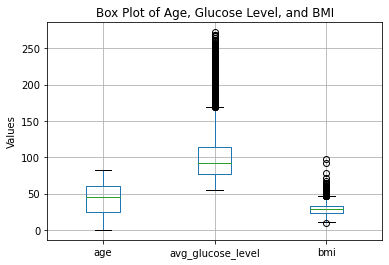

In [17]:
selected_columns = ['age', 'avg_glucose_level', 'bmi']
selected_df = df[selected_columns]

plt.figure(figsize=(6, 4))
selected_df.boxplot()
plt.title('Box Plot of Age, Glucose Level, and BMI')
plt.ylabel('Values')
plt.show()


<AxesSubplot:>

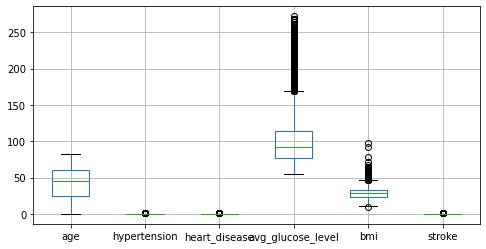

In [18]:
plt.figure(figsize=(8, 4))
df.boxplot()

## Label-Encoding

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [20]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [22]:
gender = enc.fit_transform(df["gender"])
ever_married = enc.fit_transform(df["ever_married"])
work_type = enc.fit_transform(df["work_type"])
Residence_type = enc.fit_transform(df["Residence_type"])
smoking_status = enc.fit_transform(df["smoking_status"])

In [23]:
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

In [24]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


### Chi-square

In [26]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['stroke'], df['smoking_status'])

chi2, pval, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square statistic:", chi2)
print("p-value:", pval)


Chi-Square statistic: 29.147269191399264
p-value: 2.0853997025008455e-06


In [27]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['stroke'], df['hypertension'])

chi2, pval, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square statistic:", chi2)
print("p-value:", pval)


Chi-Square statistic: 81.6053682482931
p-value: 1.661621901511823e-19


In [28]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['stroke'], df['heart_disease'])

chi2, pval, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square statistic:", chi2)
print("p-value:", pval)


Chi-Square statistic: 90.25956125843324
p-value: 2.0887845685229236e-21


In [29]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['stroke'], df['ever_married'])

chi2, pval, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square statistic:", chi2)
print("p-value:", pval)


Chi-Square statistic: 58.923890259034195
p-value: 1.6389021142314745e-14


In [30]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['stroke'], df['work_type'])

chi2, pval, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square statistic:", chi2)
print("p-value:", pval)

Chi-Square statistic: 49.163511976675295
p-value: 5.397707801896119e-10


In [31]:
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['stroke'], df['Residence_type'])

chi2, pval, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-Square statistic:", chi2)
print("p-value:", pval)

Chi-Square statistic: 1.0816367471627524
p-value: 0.29833169286876987


## Splitting the data

In [32]:
X = df.drop("stroke",axis=1)

In [33]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [34]:
Y = df['stroke']

In [35]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

## SMOTE

In [36]:
!pip install imbalanced-learn

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,Y_smote = smote.fit_resample(X,Y)

In [38]:
Y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

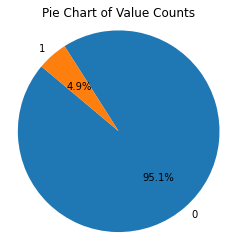

In [39]:
value_counts = Y.value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Value Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [40]:
Y_smote.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

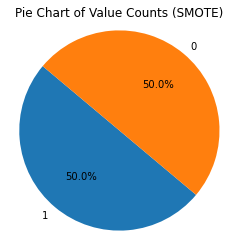

In [41]:
value_counts_smote = Y_smote.value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(value_counts_smote, labels=value_counts_smote.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Value Counts (SMOTE)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_smote,Y_smote,test_size=0.2,random_state=42)

In [43]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5377,0,66.209723,0,0,1,1,1,196.304257,28.575883,2
6692,0,68.658680,0,0,0,1,0,212.351013,37.455696,0
4996,0,40.000000,0,0,1,2,1,93.970000,23.600000,2
1561,1,62.000000,1,1,1,2,1,123.950000,34.800000,1
2114,0,29.000000,0,0,1,2,1,81.200000,23.000000,0


In [44]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1145,0,7.000000,0,0,0,4,1,88.600000,17.400000,0
8501,0,79.643023,0,0,1,2,0,66.821738,22.217616,1
3903,1,66.000000,0,0,1,2,1,103.010000,33.100000,2
1608,1,59.000000,0,0,1,2,1,93.580000,25.100000,3
9139,1,65.143497,0,0,1,2,0,76.400045,22.244934,1


In [45]:
Y_train

5377    1
6692    1
4996    0
1561    0
2114    0
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: stroke, Length: 7777, dtype: int64

In [46]:
Y_test

1145    0
8501    1
3903    0
1608    0
9139    1
       ..
6255    1
1918    0
9530    1
4184    0
5953    1
Name: stroke, Length: 1945, dtype: int64

## Normalization

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
smoking_status,5110.0,1.376908,1.071534,0.00,0.000,2.000,2.00,3.00


In [48]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [49]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [50]:
import pickle
import os

### saving the scaler object

In [51]:
scaler_path = os.path.join('C:/Users/Lakindu Nethna/Downloads/Documents/DS/Project 2/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [52]:
X_train_std

array([[-0.70458548,  0.50525355, -0.30603548, ...,  1.3697003 ,
        -0.13080687,  0.7570942 ],
       [-0.70458548,  0.61598775, -0.30603548, ...,  1.65636555,
         1.22853861, -1.31247403],
       [-0.70458548, -0.67986858, -0.30603548, ..., -0.45843712,
        -0.8925282 ,  0.7570942 ],
       ...,
       [-0.70458548,  0.81939241, -0.30603548, ...,  1.25970601,
         1.05157481,  0.7570942 ],
       [-0.70458548, -0.40856725, -0.30603548, ..., -0.34803529,
         3.19477876,  1.79187832],
       [-0.70458548,  0.21121686, -0.30603548, ..., -0.50695675,
         1.56390148, -0.27768991]])

 ## Training

#### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [54]:
 dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [55]:
dt.feature_importances_

array([0.01888176, 0.50020138, 0.01912261, 0.01269603, 0.01335589,
       0.06461358, 0.02163592, 0.17778175, 0.13492571, 0.03678536])

In [56]:
X_train .columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [57]:
Y_pred = dt.predict(X_test_std)
Y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [58]:
Y_test

1145    0
8501    1
3903    0
1608    0
9139    1
       ..
6255    1
1918    0
9530    1
4184    0
5953    1
Name: stroke, Length: 1945, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [60]:
dt_accuracy = accuracy_score(Y_test,Y_pred)
dt_accuracy

0.9023136246786633

In [61]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("DT accuracy:", accuracy)
print("DT Precision:", precision)
print("DT Recall:", recall)
print("DT F1 Score:", f1)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

DT accuracy: 0.9023136246786633
DT Precision: 0.8876739562624254
DT Recall: 0.9206185567010309
DT F1 Score: 0.9038461538461537
Confusion Matrix:
[[862 113]
 [ 77 893]]


In [62]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[862 113]
 [ 77 893]]


In [63]:
from sklearn.metrics import classification_report
classification_rep = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       975
           1       0.89      0.92      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



In [64]:
import joblib
model_path = os.path.join("C:/Users/Lakindu Nethna/Downloads/Documents/DS/Project 2/","models/dt.sav")
joblib.dump(dt,model_path)

['C:/Users/Lakindu Nethna/Downloads/Documents/DS/Project 2/models/dt.sav']

#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [66]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [67]:
Y_pred = lr.predict(X_test_std)
Y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [68]:
Y_test

1145    0
8501    1
3903    0
1608    0
9139    1
       ..
6255    1
1918    0
9530    1
4184    0
5953    1
Name: stroke, Length: 1945, dtype: int64

In [69]:
lr_accuracy = accuracy_score(Y_test,Y_pred)
lr_accuracy

0.8102827763496144

In [70]:
from sklearn.metrics import classification_report
classification_rep = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       975
           1       0.79      0.84      0.82       970

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



In [71]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("LR accuracy:", accuracy)
print("LR Precision:", precision)
print("LR Recall:", recall)
print("LR F1 Score:", f1)

LR accuracy: 0.8102827763496144
LR Precision: 0.7925998052580331
LR Recall: 0.8391752577319588
LR F1 Score: 0.8152228342513771


In [72]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[762 213]
 [156 814]]


#### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [74]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
Y_pred = knn.predict(X_test_std)
Y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [76]:
Y_test

1145    0
8501    1
3903    0
1608    0
9139    1
       ..
6255    1
1918    0
9530    1
4184    0
5953    1
Name: stroke, Length: 1945, dtype: int64

In [77]:
knn_accuracy = accuracy_score(Y_test,Y_pred)
knn_accuracy

0.8858611825192803

In [78]:
from sklearn.metrics import classification_report
classification_rep = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       975
           1       0.84      0.95      0.89       970

    accuracy                           0.89      1945
   macro avg       0.89      0.89      0.89      1945
weighted avg       0.89      0.89      0.89      1945



In [79]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("KNN accuracy:", accuracy)
print("KNN precision:", precision)
print("KNN recall:", recall)
print("KNN F1 Score:", f1)

KNN accuracy: 0.8858611825192803
KNN precision: 0.8387681159420289
KNN recall: 0.954639175257732
KNN F1 Score: 0.892960462873674


In [80]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[797 178]
 [ 44 926]]


#### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [82]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [83]:
Y_pred = rf.predict(X_test_std)
Y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [84]:
Y_test

1145    0
8501    1
3903    0
1608    0
9139    1
       ..
6255    1
1918    0
9530    1
4184    0
5953    1
Name: stroke, Length: 1945, dtype: int64

In [85]:
rf_accuracy = accuracy_score(Y_test,Y_pred)
rf_accuracy

0.9480719794344473

In [86]:
from sklearn.metrics import classification_report
classification_rep = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       975
           1       0.93      0.97      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [87]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("RF accuracy:", accuracy)
print("RF precision:", precision)
print("RF recall:", recall)
print("RF F1 Score:", f1)

RF accuracy: 0.9480719794344473
RF precision: 0.9314796425024826
RF recall: 0.9670103092783505
RF F1 Score: 0.9489124936772888


In [88]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[906  69]
 [ 32 938]]


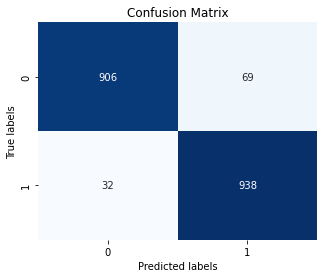

In [89]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
lr_accuracy

0.8102827763496144

In [91]:
knn_accuracy

0.8858611825192803

In [92]:
dt_accuracy

0.9023136246786633

#### SVM

In [93]:
from sklearn.svm import SVC
sv = SVC()

In [94]:
sv.fit(X_train_std,Y_train)

SVC()

In [95]:
Y_pred = sv.predict(X_test_std)
Y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [96]:
from sklearn.metrics import classification_report
classification_rep = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       975
           1       0.82      0.90      0.86       970

    accuracy                           0.85      1945
   macro avg       0.85      0.85      0.85      1945
weighted avg       0.85      0.85      0.85      1945



In [97]:
sv_accuracy = accuracy_score(Y_test,Y_pred)
sv_accuracy

0.8508997429305912

In [98]:
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("SVM accuracy:", accuracy)
print("SVM precision:", precision)
print("SVM recall:", recall)
print("SVM F1 Score:", f1)

SVM accuracy: 0.8508997429305912
SVM precision: 0.8207547169811321
SVM recall: 0.8969072164948454
SVM F1 Score: 0.8571428571428572


In [99]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[785 190]
 [100 870]]


<function matplotlib.pyplot.show(close=None, block=None)>

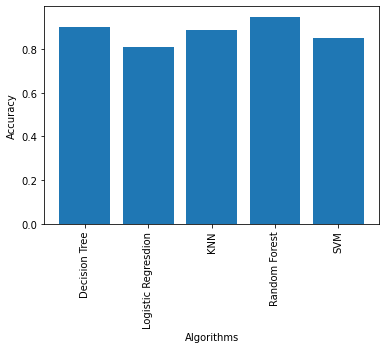

In [100]:
plt.bar(['Decision Tree','Logistic Regresdion','KNN','Random Forest','SVM'],[dt_accuracy,lr_accuracy,knn_accuracy,rf_accuracy,sv_accuracy])
plt.xlabel('Algorithms')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show

In [109]:
import pickle

model_path = 'C:/Users/Lakindu Nethna/Downloads/Documents/DS/Project 2/rf.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(rf, f)